In [ ]:
%pip install yfinance pynance plotly 

import os
import sys
import talib
import pandas as pd
import yfinance as yf
import pynance as pn
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Loaded files: ['AAPL_historical_data.csv', 'AMZN_historical_data.csv', 'GOOG_historical_data.csv', 'META_historical_data.csv', 'MSFT_historical_data.csv', 'NVDA_historical_data.csv', 'TSLA_historical_data.csv']
Selected filename: AAPL_historical_data.csv
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 

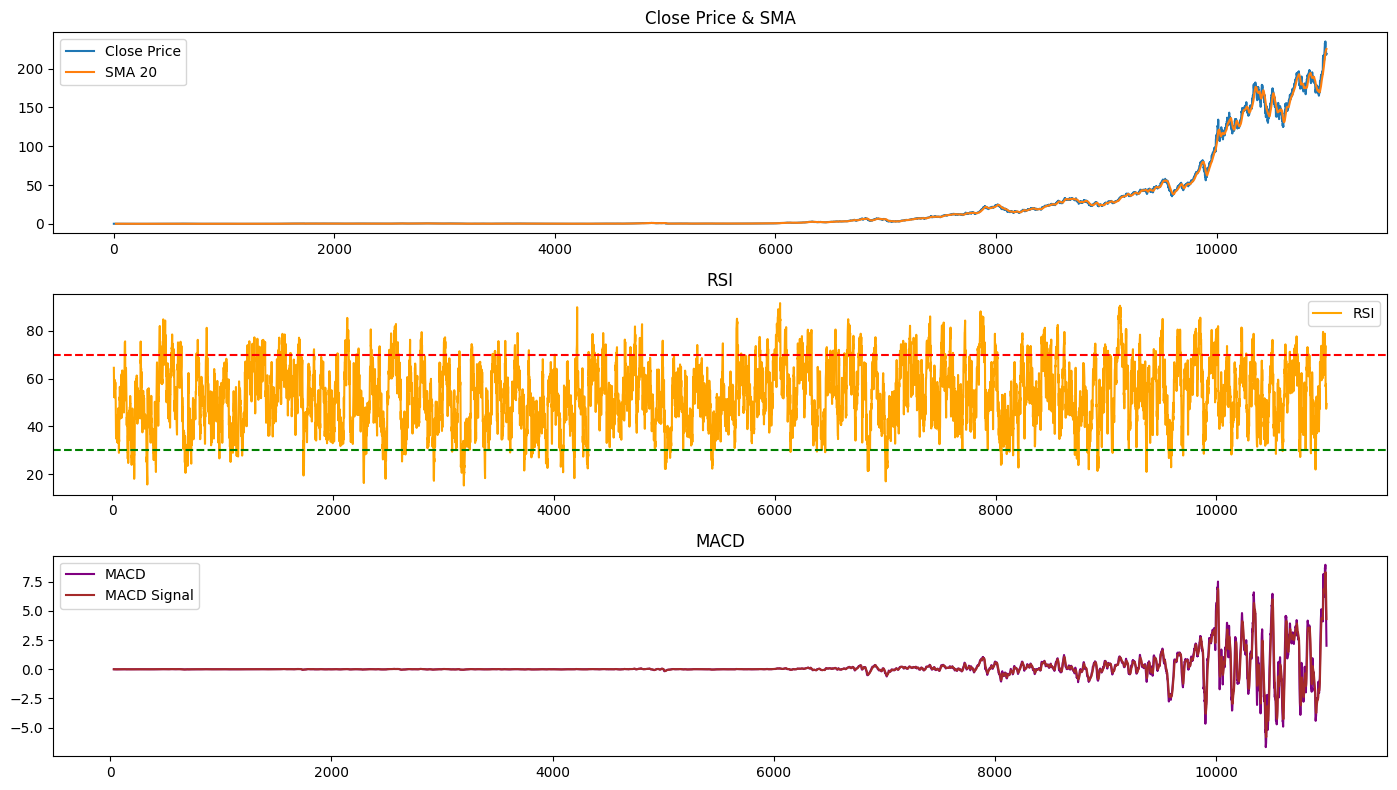

Report: {'missing_values': {'Date': 0, 'Open': 0, 'High': 0, 'Low': 0, 'Close': 0, 'Adj Close': 0, 'Volume': 0, 'Dividends': 0, 'Stock Splits': 0, 'SMA_20': 19, 'RSI': 14, 'MACD': 33, 'MACD_signal': 33}, 'summary_statistics': {'Open': {'count': 10998.0, 'mean': 22.299160011953404, 'std': 46.003684660364485, 'min': 0.0496650002896785, '25%': 0.2991069853305816, '50%': 0.53125, '75%': 20.204195976257324, 'max': 236.47999572753903}, 'High': {'count': 10998.0, 'mean': 22.539055202034024, 'std': 46.49603055785277, 'min': 0.0496650002896785, '25%': 0.3037104904651642, '50%': 0.5379459857940674, '75%': 20.389554023742676, 'max': 237.22999572753903}, 'Low': {'count': 10998.0, 'mean': 22.068367156640623, 'std': 45.54092858157874, 'min': 0.0491070002317428, '25%': 0.2901790142059326, '50%': 0.5223209857940674, '75%': 19.99803638458252, 'max': 233.08999633789065}, 'Close': {'count': 10998.0, 'mean': 22.312754411817718, 'std': 46.037660077626796, 'min': 0.0491070002317428, '25%': 0.298548996448516

In [ ]:
import os
import pandas as pd
import pynance as pn
import talib
import numpy as np
import matplotlib.pyplot as plt

class StockDataAnalyzer:
    def __init__(self, data_folder):
        self.data_folder = data_folder
        self.dataframes = self._load_all_data()
    
    def _load_all_data(self):
        dfs = {}
        if not os.path.exists(self.data_folder):
            os.makedirs(self.data_folder)
        for file in os.listdir(self.data_folder):
            if file.endswith('.csv'):
                path = os.path.join(self.data_folder, file)
                df = pd.read_csv(path)
                dfs[file] = df
        return dfs

    def head(self, filename, n=5):
        return self.dataframes[filename].head(n)

    def info(self, filename):
        return self.dataframes[filename].info()

    def check_missing(self, filename):
        return self.dataframes[filename].isnull().sum()

    def summary_statistics(self, filename):
        return self.dataframes[filename].describe()

    def shape(self, filename):
        return self.dataframes[filename].shape

    def check_uniqueness(self, filename):
        return self.dataframes[filename].nunique()

    def prepare_data(self, filename):
        df = self.dataframes[filename]
        required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
        for col in required_cols:
            if col not in df.columns:
                raise ValueError(f"Missing column: {col}")
        df = df.dropna(subset=required_cols)
        self.dataframes[filename] = df
        return df

    def add_talib_indicators(self, filename):
        df = self.dataframes[filename]
        df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
        df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
        macd, macdsignal, macdhist = talib.MACD(df['Close'])
        df['MACD'] = macd
        df['MACD_signal'] = macdsignal
        self.dataframes[filename] = df
        return df

    def visualize(self, filename):
        df = self.dataframes[filename]
        plt.figure(figsize=(14, 8))
        plt.subplot(3, 1, 1)
        plt.plot(df['Close'], label='Close Price')
        plt.plot(df['SMA_20'], label='SMA 20')
        plt.title('Close Price & SMA')
        plt.legend()
        plt.subplot(3, 1, 2)
        plt.plot(df['RSI'], label='RSI', color='orange')
        plt.axhline(70, color='red', linestyle='--')
        plt.axhline(30, color='green', linestyle='--')
        plt.title('RSI')
        plt.legend()
        plt.subplot(3, 1, 3)
        plt.plot(df['MACD'], label='MACD', color='purple')
        plt.plot(df['MACD_signal'], label='MACD Signal', color='brown')
        plt.title('MACD')
        plt.legend()
        plt.tight_layout()
        plt.show()

    def report(self, filename):
        df = self.dataframes[filename]
        report = {
            "missing_values": df.isnull().sum().to_dict(),
            "summary_statistics": df.describe().to_dict(),
            "shape": df.shape,
            "unique_counts": df.nunique().to_dict(),
            "recommendations": [
                "Consider using SMA and RSI for trend and momentum analysis.",
                "Monitor MACD crossovers for potential buy/sell signals.",
                "Handle missing values and outliers before modeling.",
                "Visualize indicators regularly to spot market changes."
            ]
        }
        return report

# Usage with the correct dataset path
data_folder = '../data/yfinance_data'
analyzer = StockDataAnalyzer(data_folder=data_folder)
loaded_files = list(analyzer.dataframes.keys())
print("Loaded files:", loaded_files)

if loaded_files:
    filename = loaded_files[0]
    print("Selected filename:", filename)
    print(analyzer.head(filename))
    analyzer.info(filename)
    print("Missing values:\n", analyzer.check_missing(filename))
    print(analyzer.summary_statistics(filename))
    print("Shape:", analyzer.shape(filename))
    print("Unique counts:\n", analyzer.check_uniqueness(filename))
    analyzer.prepare_data(filename)
    analyzer.add_talib_indicators(filename)
    analyzer.visualize(filename)
    report = analyzer.report(filename)
    print("Report:", report)
else:
    print("No CSV files found in '../data/yfinance_data'. Please add data files.")

In [15]:
# Load the stock price data for the selected filename into a pandas DataFrame
df = analyzer.dataframes[filename]

# Display the first few rows to ensure required columns are present
print(df.head())

# Check if required columns exist
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present.")

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  SMA_20  RSI  MACD  MACD_signal  
0        0.0           0.0     NaN  NaN   NaN          NaN  
1        0.0           0.0     NaN  NaN   NaN          NaN  
2        0.0           0.0     NaN  NaN   NaN          NaN  
3        0.0           0.0     NaN  NaN   NaN          NaN  
4        0.0           0.0     NaN  NaN   NaN          NaN  
All required columns are present.


In [16]:
# Calculate and add technical indicators using TA-Lib
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
macd, macd_signal, macd_hist = talib.MACD(df['Close'])
df['MACD'] = macd
df['MACD_signal'] = macd_signal
df['MACD_hist'] = macd_hist

# Display the last few rows to verify the indicators
print(df[['Close', 'SMA_50', 'EMA_20', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist']].tail())

            Close      SMA_50      EMA_20     RSI_14      MACD  MACD_signal  \
10993  218.539993  208.474199  222.376929  48.687742  4.662717     6.678882   
10994  217.490005  209.098399  221.911508  47.386437  3.748082     6.092722   
10995  217.960007  209.709000  221.535174  48.055700  3.026267     5.479431   
10996  218.240005  210.279400  221.221349  48.476184  2.448591     4.873263   
10997  218.800003  210.858600  220.990744  49.359115  2.012764     4.301163   

       MACD_hist  
10993  -2.016164  
10994  -2.344640  
10995  -2.453164  
10996  -2.424672  
10997  -2.288399  


In [19]:
# Extract and concatenate all datasets from the data_folder for analysis
dfs = []
for file in loaded_files:
    df_temp = analyzer.dataframes[file].copy()
    ticker = file.split('_')[0]
    df_temp['Ticker'] = ticker
    dfs.append(df_temp)

combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.head())
print("Combined shape:", combined_df.shape)
print("Tickers in combined_df:", combined_df['Ticker'].unique())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  SMA_20  RSI  MACD  MACD_signal  SMA_50  EMA_20  \
0        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
1        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
2        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
3        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
4        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   

   RSI_14  MACD_hist Ticker  
0     NaN        NaN   AAP

In [20]:
# Load the stock price data for a specific ticker (e.g., TSLA) into a pandas DataFrame
# The variable 'temp_df' already contains the TSLA stock price data

print(temp_df.head())

# Ensure required columns are present
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_columns = [col for col in required_columns if col not in temp_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present in temp_df.")

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits Ticker  
0        0.0           0.0   TSLA  
1        0.0           0.0   TSLA  
2        0.0           0.0   TSLA  
3        0.0           0.0   TSLA  
4        0.0           0.0   TSLA  
All required columns are present in temp_df.


In [21]:
# Load stock price data for selected tickers into a pandas DataFrame
# The variable 'combined_df' already contains all the required data for AAPL, AMZN, GOOG, META, MSFT, NVDA, TSLA

# Display the first few rows and check required columns
print(combined_df.head())

required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_columns = [col for col in required_columns if col not in combined_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All required columns are present in combined_df.")

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  SMA_20  RSI  MACD  MACD_signal  SMA_50  EMA_20  \
0        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
1        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
2        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
3        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   
4        0.0           0.0     NaN  NaN   NaN          NaN     NaN     NaN   

   RSI_14  MACD_hist Ticker  
0     NaN        NaN   AAP

In [22]:
# The variable 'combined_df' already contains all the required stock price data for AAPL, AMZN, GOOG, META, MSFT, NVDA, and TSLA
# and includes columns: Open, High, Low, Close, and Volume.

# Group the data by the 'Ticker' column (which represents the stock name)
grouped = combined_df.groupby('Ticker')

# Display the first entry for each group to verify
for name, group in grouped:
    print(f"Ticker: {name}")
    print(group[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].head(1))

Ticker: AAPL
         Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
Ticker: AMZN
             Date      Open   High       Low     Close      Volume
10998  1997-05-15  0.121875  0.125  0.096354  0.097917  1443120000
Ticker: GOOG
             Date      Open      High       Low     Close     Volume
17844  2004-08-19  2.490664  2.591785  2.390042  2.499133  897427216
Ticker: META
             Date  Open       High        Low  Close    Volume
22864  2012-12-12  28.0  28.139999  27.370001  27.58  46704200
Ticker: MSFT
             Date      Open      High       Low     Close      Volume
25790  1986-03-13  0.088542  0.101563  0.088542  0.097222  1031788800
Ticker: NVDA
             Date     Open      High       Low     Close      Volume
35462  1999-01-22  0.04375  0.048828  0.038802  0.041016  2714688000
Ticker: TSLA
             Date      Open      High       Low     Close     Volume
41883  2010-06-29  1.266667  1.666

In [ ]:
import pynance as pn

# Apply TA-Lib technical indicators to combined_df for each ticker
for ticker in combined_df['Ticker'].unique():
    mask = combined_df['Ticker'] == ticker
    combined_df.loc[mask, 'SMA_20'] = talib.SMA(combined_df.loc[mask, 'Close'], timeperiod=20)
    combined_df.loc[mask, 'RSI_14'] = talib.RSI(combined_df.loc[mask, 'Close'], timeperiod=14)
    macd, macd_signal, macd_hist = talib.MACD(combined_df.loc[mask, 'Close'])
    combined_df.loc[mask, 'MACD'] = macd
    combined_df.loc[mask, 'MACD_signal'] = macd_signal
    combined_df.loc[mask, 'MACD_hist'] = macd_hist

# Example: Use PyNance for financial metrics (e.g., annualized volatility)

# Calculate annualized volatility for each ticker
volatility = {}
for ticker in combined_df['Ticker'].unique():
    close_prices = combined_df.loc[combined_df['Ticker'] == ticker, 'Close']
    returns = close_prices.pct_change().dropna()
    volatility[ticker] = pn.metrics.annualized_volatility(returns)

print("Annualized Volatility by Ticker:", volatility)

# Visualize Close price and indicators for a selected ticker (e.g., AAPL)
selected_ticker = 'AAPL'
df_plot = combined_df[combined_df['Ticker'] == selected_ticker]

plt.figure(figsize=(14, 8))
plt.plot(df_plot['Date'], df_plot['Close'], label='Close Price')
plt.plot(df_plot['Date'], df_plot['SMA_20'], label='SMA 20')
plt.title(f'{selected_ticker} Close Price & SMA 20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df_plot['Date'], df_plot['RSI_14'], label='RSI 14', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title(f'{selected_ticker} RSI 14')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(df_plot['Date'], df_plot['MACD'], label='MACD', color='purple')
plt.plot(df_plot['Date'], df_plot['MACD_signal'], label='MACD Signal', color='brown')
plt.bar(df_plot['Date'], df_plot['MACD_hist'], label='MACD Hist', color='gray', alpha=0.3)
plt.title(f'{selected_ticker} MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      ERROR: Could not find a version that satisfies the requirement setuptools (from versions: none)
      ERROR: No matching distribution found for setuptools
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [29]:
%pip install TA-Lib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
